## Verifying treecorr patch stochasiticity's effect on jackknife

- Defining patches in catalogue affects resulting values due to different numerical realization
- Stochasticity in patches has significant bearing on resulting tangential shear values of similar order to 
    signal magnitude 
- Tried adding patches into catalogues to see if it boosted SNR

In [1]:
import numpy as np
import treecorr
import des_functions as des
from more_itertools import locate
import time
import astropy.io.fits as fits 
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['cmr10']
plt.rcParams['mathtext.fontset'] ='cm'
data_dir = '/home/b7009348/WGL_project/DES-data/'

In [2]:
#des.create_patches(lens_file=lens_file, npatches=npatches)

In [4]:
des.cut_redshift(mcal_file, z_file, 'mcal', 0., 0.90)
des.cut_redshift(im3_file, z_file, 'im3', 0., 0.90)

Opening files...
Locating sources in range 0 - 0.9...
Sources in range found, slicing data...
Matching redshifts to catalogue...
Slicing catalogue data...
Data sliced, writing to new file...
Runtime: 181.164
Opening files...
Locating sources in range 0 - 0.9...
Sources in range found, slicing data...
Matching redshifts to catalogue...
Slicing catalogue data...
Data sliced, writing to new file...
Runtime: 68.9189


In [2]:
lens_file = 'DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits'
rand_file = 'DES_Y1A1_3x2pt_redMaGiC_RANDOMS.fits'
im3_file = 'y1_im3_shapes_matched.fits'
mcal_file = 'y1_mcal_shapes_matched.fits'
z_file = 'mcal_BPZ_(binning).fits'

lens_maxIA = 'DES_Y1A1_Lenses_z=0.75-0.9.fits'
mcal_maxIA = 'y1_mcal_z=0-0.9.fits'
im3_maxIA = 'y1_im3_z=0-0.9.fits'

In [3]:
npatches= 20
sep_bins = 10
theta_min = 2.5
theta_max = 250.0
slops = 0.1

Catalogues created, runtime=35.596230.
Patch 0 located and sliced, calculating correlations...
IA signal estimated, runtime=271.871207.
Patch 1 located and sliced, calculating correlations...
IA signal estimated, runtime=263.743874.
Patch 2 located and sliced, calculating correlations...
IA signal estimated, runtime=247.951798.
Patch 3 located and sliced, calculating correlations...
IA signal estimated, runtime=365.090426.
Patch 4 located and sliced, calculating correlations...
IA signal estimated, runtime=227.226502.
Patch 5 located and sliced, calculating correlations...
IA signal estimated, runtime=223.018227.
Patch 6 located and sliced, calculating correlations...
IA signal estimated, runtime=230.530726.
Patch 7 located and sliced, calculating correlations...
IA signal estimated, runtime=235.269482.
Patch 8 located and sliced, calculating correlations...
IA signal estimated, runtime=262.192664.
Patch 9 located and sliced, calculating correlations...
IA signal estimated, runtime=251

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


Full signal estimated, runtime =296.084042.


/tmp/ipykernel_41018/3901774927.py:86: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.errorbar(theta, IA_final, yerr=IA_sig, lw=0, marker='o', color='navy', markersize=5, elinewidth=1, capsize=3)


[6.91022533e-04 4.92418492e-04 2.45885300e-04 2.59319531e-04
 1.98424087e-04 7.62201295e-05 6.12030167e-05 7.82848448e-05
 4.72200061e-05 3.04836266e-05] [5.60793531e-04 3.70129558e-04 2.95898156e-04 2.05486204e-04
 1.12197100e-04 9.44077264e-05 6.57425843e-05 4.73528563e-05
 4.33000348e-05 5.53847566e-05]


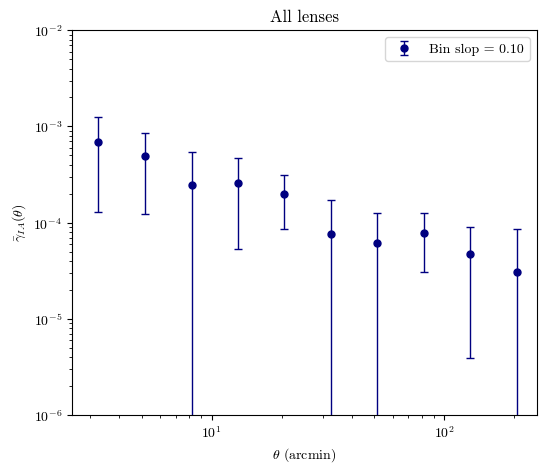

In [4]:
start=time.time()

with fits.open(data_dir+lens_file) as hdu:
    data = hdu[1].data
    ra_l = data['RA']
    dec_l = data['DEC']
    w_l = data['weight']
del data

cat_l = treecorr.Catalog(ra=ra_l, dec=dec_l, ra_units='deg', dec_units='deg', w=w_l, patch_centers=data_dir+'jackknife_patch_centers')

del ra_l, dec_l, w_l

with fits.open(data_dir+rand_file) as hdu:
    data = hdu[1].data
    #indexes = list(locate(data['z'], lambda x: 0.75 < x < 0.90)) # cut randoms to same redshift as lenses 
    rand_z = data['z']#[indexes]
    ra_r = data['RA']#[indexes]
    dec_r = data['DEC']#[indexes]
del data

cat_r = treecorr.Catalog(ra=ra_r, dec=dec_r, ra_units='deg', dec_units='deg', r=rand_z, patch_centers=data_dir+'jackknife_patch_centers')

del ra_r, dec_r, rand_z

with fits.open(data_dir+mcal_file) as hdu:
    data = hdu[1].data
    ra_s = data['ra']
    dec_s = data['dec']
    e1 = data['e1']
    e2 = data['e2']
    R11 = data['R11']
del data

cat_mcal = treecorr.Catalog(ra=ra_s, dec=dec_s, ra_units='deg', dec_units='deg', r=R11, g1=e1, g2=e2, patch_centers=data_dir+'jackknife_patch_centers')

del ra_s, dec_s, e1, e2, R11

with fits.open(data_dir+im3_file) as hdu:
    data = hdu[1].data
    im3_ID = data['coadd_objects_id']
    ra_s = data['ra']
    dec_s = data['dec']
    e1 = data['e1'] - data['c1']
    e2 = data['e2'] - data['c2']
    sens = data['m'] + 1.0
    w = data['weight']
del data

with fits.open(data_dir+z_file) as hdu:
    data = hdu[1].data
    zmc = data['z_mc']
    zmc_ID = data['coadd_objects_id']
del data

matches, zmc_indices, shape_indices = np.intersect1d(zmc_ID, im3_ID, return_indices=True)

zmc = zmc[zmc_indices]

del zmc_ID, matches, zmc_indices, shape_indices, im3_ID

cat_im3 = treecorr.Catalog(ra=ra_s, dec=dec_s, ra_units='deg', dec_units='deg', r=zmc, g1=e1, g2=e2, w=w, 
                           patch_centers=data_dir+'jackknife_patch_centers')
cat_k = treecorr.Catalog(ra=ra_s, dec=dec_s, ra_units='deg', dec_units='deg', k=sens, w=w, patch_centers=data_dir+'jackknife_patch_centers')

del ra_s, dec_s, e1, e2, sens, zmc, w

end = time.time()
diff=end-start

print('Catalogues created, runtime=%f.'%diff)

IA_final = np.zeros([sep_bins])
IA_sig = np.zeros_like(IA_final)

log_shift = np.logspace(np.log10(0.025), np.log10(2.5), 20)
    
IA_jk, IA_sig = des.IA_jackknife(cat_l=cat_l, cat_r=cat_r, cat_mcal=cat_mcal, cat_im3=cat_im3, cat_k=cat_k, sep_bins=sep_bins, npatches=npatches, fbins=810,
                                    theta_min=theta_min, theta_max=theta_max, bin_slop=slops)

IA_final, theta = des.IA_full(cat_l=cat_l, cat_r=cat_r, cat_mcal=cat_mcal, cat_im3=cat_im3, cat_k=cat_k, sep_bins=sep_bins, fbins=810, 
                                  theta_min=theta_min, theta_max=theta_max, bin_slop=slops)                           


plt.figure(figsize=[6,5])
plt.errorbar(theta, IA_final, yerr=IA_sig, lw=0, marker='o', color='navy', markersize=5, elinewidth=1, capsize=3)    
plt.yscale('log')
plt.xscale('log')
plt.ylim([1e-6, 1e-2])
plt.xlim([2.5,250])
plt.xlabel(r'$\theta$ (arcmin)')
plt.ylabel(r'$\bar{\gamma}_{IA}(\theta)$')
plt.title('All lenses')    
plt.legend(['Bin slop = 0.10'])
plt.savefig('IA_Bins=10_BinSlop=0.1.png', dpi=300)
    
print(IA_final, IA_sig) 

del cat_l, cat_r, cat_im3, cat_mcal, cat_k

In [12]:
jackknife_values = np.load(data_dir+'ia_jackknife_values-bin_slop=0.1.npz')

In [13]:
cov = jackknife_values['IA_cov']

In [15]:
print(np.diag(cov))

[4.29750942e-07 5.61629791e-07 1.43377100e-07 1.55265943e-07
 1.09650227e-07 1.00863059e-07 7.44546908e-08 3.89565698e-08
 3.78210078e-08 1.62356435e-08 1.74847920e-08 1.26897925e-08
 9.08777049e-09 4.66575360e-09 4.70412120e-09 5.19452139e-09
 2.41631731e-09 3.64379169e-09 2.56711809e-09 2.38804085e-09]


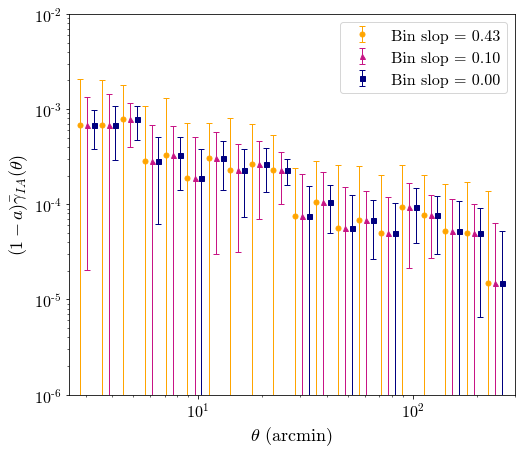

In [85]:
jackknifes = ['ia_jackknife_values-bin_slop=0.43.npz', 'ia_jackknife_values-bin_slop=0.1.npz', 'ia_jackknife_values-bin_slop=0.npz']
fulls = ['ia_full_values-bin_slop=0.43.npz', 'ia_full_values-bin_slop=0.1.npz', 'ia_full_values-bin_slop=0.npz']
colors = ['orange', 'mediumvioletred', 'navy']
markers = ['o', '^', 's']
plt.figure(figsize=[8,7])
for i in range(len(fulls)):

    data_dir = '/home/b7009348/WGL_project/DES-data/'
    jackknife  = np.load(data_dir+jackknifes[i])
    full_data = np.load(data_dir+fulls[i])

    # select parts of data needed for fitting
    data_points = full_data['IA']
    IA_sig = np.sqrt(np.diag(jackknife['IA_cov']))
    
    logshift = 0.08*theta

    plt.errorbar(theta+logshift*i, IA_final, yerr=IA_sig, lw=0, color=colors[i], markersize=5, elinewidth=1, capsize=3, marker=markers[i])    
    plt.yscale('log')
    plt.xscale('log')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim([1e-6, 1e-2])
    plt.xlim([2.5,300])
    plt.xlabel(r'$\theta$ (arcmin)', fontsize=18)
    plt.ylabel(r'$(1-a)\bar{\gamma}_{IA}(\theta)$', fontsize=18)  
    
plt.legend(['Bin slop = 0.43', 'Bin slop = 0.10', 'Bin slop = 0.00'], fontsize=16)    
plt.savefig('IA_BinSlop_comparison.png', dpi=300)

In [5]:
jackknife = np.load(data_dir+'ia_jackknife_values-bin_slop=0.npz')
IA_sig = np.sqrt(np.diag(jackknife['IA_cov']))
mcal_patches = jackknife['mcal']
im3_patches = jackknife['im3']
boost_patches = jackknife['boost']
F_patches = jackknife['F']

F = 1.0/npatches * np.sum(F_patches)
mcal_jk = np.zeros([sep_bins])
im3_jk = np.zeros_like(mcal_jk)
boost_jk = np.zeros_like(mcal_jk)
mcal_sig = np.zeros_like(mcal_jk)
im3_sig = np.zeros_like(mcal_jk)
boost_sig = np.zeros_like(mcal_jk)
for i in range(sep_bins): 
    bin_patches = mcal_patches[:,i] 
    mcal_jk[i] = 1.0/npatches * np.sum(bin_patches)
    
    bin_patches = im3_patches[:,i] 
    im3_jk[i] = 1.0/npatches * np.sum(bin_patches)
    
    bin_patches = boost_patches[:,i] 
    boost_jk[i] = 1.0/npatches * np.sum(bin_patches)
    
F_sig  = np.sqrt((npatches-1.0)/npatches * np.sum((F_patches[:]-F)**2))    
print(F_sig)    
for i in range(sep_bins):
        mcal_sig[i] = np.sqrt((npatches-1.0)/npatches * np.sum((mcal_patches[:,i] - mcal_jk[i])**2))
        im3_sig[i] = np.sqrt((npatches-1.0)/npatches * np.sum((im3_patches[:,i] - im3_jk[i])**2))
        boost_sig[i] = np.sqrt((npatches-1.0)/npatches * np.sum((boost_patches[:,i] - boost_jk[i])**2))

0.0009430450359923301


In [6]:
full = np.load(data_dir+'ia_full_values-bin_slop=0.npz')
mcal = full['mcal']
im3 = full['im3']
boost = full['boost']
F = full['F']
IA = full['IA']

print(F)

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['cmr10']
plt.rcParams['mathtext.fontset'] ='cm'

plt.figure(figsize=[6,5])
plt.errorbar(theta, mcal, yerr=mcal_sig, lw=0, color='orange', markersize=5, elinewidth=1, capsize=4, marker='o')    
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([1e-6, 1e-2])
plt.xlim([2.5,250])
plt.xlabel(r'$\theta$ (arcmin)', fontsize=16)
plt.ylabel(r'$\gamma_{t}^{MCAL}(\theta)$', fontsize=16)
plt.savefig('MCAL_binslop=0.png',dpi=300)

plt.figure(figsize=[6,5])
plt.errorbar(theta, mcal, yerr=im3_sig, lw=0, color='mediumvioletred', markersize=5, elinewidth=1, capsize=4, marker='o')    
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([1e-6, 1e-2])
plt.xlim([2.5,250])
plt.xlabel(r'$\theta$ (arcmin)', fontsize=16)
plt.ylabel(r'$\gamma_{t}^{IM3}(\theta)$', fontsize=16)
plt.savefig('IM3_binslop=0.png',dpi=300)

plt.figure(figsize=[6.25,5.25])
plt.errorbar(theta, boost, yerr=boost_sig, lw=0, color='navy', markersize=5, elinewidth=1, capsize=4, marker='o')    
plt.xscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([2.5,250])
plt.xlabel(r'$\theta$ (arcmin)', fontsize=16)
plt.ylabel(r'$B(\theta)$', fontsize=16)
plt.savefig('boost_binslop=0.png',dpi=300)

plt.figure(figsize=[6,5])
plt.errorbar(theta, IA, yerr=IA_sig, lw=0, color='black', markersize=5, elinewidth=1, capsize=4, marker='o')    
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([1e-6, 1e-2])
plt.xlim([2.5,250])
plt.xlabel(r'$\theta$ (arcmin)', fontsize=16)
plt.ylabel(r'$(1-a)\bar{\gamma}_{IA}(\theta)$', fontsize=16)
plt.savefig('IA_binslop=0.png',dpi=300)

0.07337595183326624


NameError: name 'theta' is not defined

<Figure size 432x360 with 0 Axes>

In [12]:
with fits.open(data_dir+lens_file) as hdu:
    data = hdu[1].data
    ra_l = data['RA']
    dec_l = data['DEC']
    w_l = data['weight']
del data

cat_l = treecorr.Catalog(ra=ra_l, dec=dec_l, ra_units='deg', dec_units='deg', w=w_l)

del ra_l, dec_l, w_l

with fits.open(data_dir+rand_file) as hdu:
    data = hdu[1].data
    ra_r = data['RA']
    dec_r = data['DEC']
    rand_z = data['z']
del data

cat_r = treecorr.Catalog(ra=ra_r, dec=dec_r, ra_units='deg', dec_units='deg')

del ra_r, dec_r, rand_z

with fits.open(data_dir+mcal_file) as hdu:
    data = hdu[1].data
    ra_s = data['ra']
    dec_s = data['dec']
    e1 = data['e1']
    e2 = data['e2']
    R11 = data['R11']
del data

cat_mcal = treecorr.Catalog(ra=ra_s, dec=dec_s, ra_units='deg', dec_units='deg', g1=e1, g2=e2, w=R11)

del ra_s, dec_s, e1, e2, R11

with fits.open(data_dir+im3_file) as hdu:
    data = hdu[1].data
    im3_ID = data['coadd_objects_id']
    ra_s = data['ra']
    dec_s = data['dec']
    e1 = data['e1'] - data['c1']
    e2 = data['e2'] - data['c2']
    sens = data['m'] + 1.0
    w = data['weight']
del data

with fits.open(data_dir+z_file) as hdu:
    data = hdu[1].data
    zmc = data['z_mc']
    zmc_ID = data['coadd_objects_id']
del data

matches, zmc_indices, shape_indices = np.intersect1d(zmc_ID, im3_ID, return_indices=True)

zmc = zmc[zmc_indices]

del zmc_ID, matches, zmc_indices, shape_indices, im3_ID

cat_im3 = treecorr.Catalog(ra=ra_s, dec=dec_s, ra_units='deg', dec_units='deg', g1=e1, g2=e2, w=w)

del ra_s, dec_s, e1, e2, sens, zmc, w

In [13]:
b_im3 = des.calculate_boost(cat_l, cat_r, cat_im3, 10, 2.5, 250)

b_mcal = des.calculate_boost(cat_l, cat_r, cat_mcal, 10, 2.5, 250)

In [16]:
print(b_im3)
print(b_mcal)

print(100 - np.mean(b_mcal/b_im3 * 100))

[1.03298038 1.0230358  1.01691024 1.01282186 1.00939403 1.00690594
 1.00465278 1.00321467 1.00163256 1.000878  ]
[1.03169297 1.0226146  1.01668356 1.01267815 1.0092496  1.00678367
 1.00458431 1.00312692 1.00153596 1.00085796]
0.025594345107549543
